# Proyek Klasifikasi Gambar: Bone Break
- **Nama:** Mufidatul Ngazizah
- **Email:** mufidatul.ngazizah@gmail.com
- **ID Dicoding:** MufidatulN

## Import Semua Packages/Library yang Digunakan

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory as utils
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.optimizers import Adam

## Data Preparation

### Data Loading

In [ ]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("pkdarabi/bone-break-classification-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/pkdarabi/bone-break-classification-image-dataset/versions/4


In [ ]:
data_dir = "/root/.cache/kagglehub/datasets/pkdarabi/bone-break-classification-image-dataset/versions/4/Bone Break Classification/Bone Break Classification"

### Data Preprocessing

In [ ]:
# datagen = ImageDataGenerator(
#     rescale=1./255)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    # rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

test_datagen = ImageDataGenerator(
    rescale=1./255)

#### Split Dataset

In [ ]:
train_dir = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=(256, 256),
    batch_size=32
)

val_dir = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(256, 256),
    batch_size=32
)

Found 1129 files belonging to 10 classes.
Using 1017 files for training.
Found 1129 files belonging to 10 classes.
Using 112 files for validation.


In [ ]:
# Nama Class
nama_class = train_dir.class_names
print(nama_class)

['Avulsion fracture', 'Comminuted fracture', 'Fracture Dislocation', 'Greenstick fracture', 'Hairline Fracture', 'Impacted fracture', 'Longitudinal fracture', 'Oblique fracture', 'Pathological fracture', 'Spiral Fracture']


In [ ]:
print(type(train_dir))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [ ]:
def normalize(image, label):
  return image/255.0, label

train_data = train_dir.map(normalize)
val_data= val_dir.map(normalize)

In [ ]:
for img, label in train_data.take(1):
  print(type(img),type(label))

<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
train_x=[]
train_y=[]
for image,label in train_data:
   train_x.append(image)
   train_y.append(label)
   print(type(train_y))
train_x = tf.concat(train_x, axis=0)
train_y = tf.concat(train_y, axis=0)

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [ ]:
val_x=[]
val_y=[]
for image,label in train_data:
   val_x.append(image)
   val_y.append(label)
val_x = tf.concat(val_x, axis=0)
val_y = tf.concat(val_y, axis=0)

In [ ]:
num_classes = 10
train_y = tf.keras.utils.to_categorical(train_y, num_classes=num_classes)
val_y = tf.keras.utils.to_categorical(val_y, num_classes=num_classes)

## Modelling

In [ ]:
# Callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.85 and logs.get('val_accuracy') > 0.85):
            print("Accuracy is enough")
            self.model.stop_training = True

In [ ]:
model = Sequential()
model.add(Conv2D(60, (3, 3), activation='relu', input_shape=(256, 256, 3)))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(120, (3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(40, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 60)      1680      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 127, 127, 60)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 120)     64920     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 62, 62, 120)       0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 461280)            0         
                                                                 
 dense_2 (Dense)             (None, 40)               

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_x, train_y, batch_size=10, epochs=20,
          validation_data=(val_x,val_y), callbacks=[myCallback()])
history

Epoch 1/20
  6/102 [>.............................] - ETA: 4s - loss: 5.9857 - accuracy: 0.1500

102/102 [==============================] - 7s 58ms/step - loss: 2.5230 - accuracy: 0.1131 - val_loss: 2.2809 - val_accuracy: 0.1780
Epoch 2/20
102/102 [==============================] - 5s 49ms/step - loss: 2.2323 - accuracy: 0.1878 - val_loss: 1.8739 - val_accuracy: 0.4022
Epoch 3/20
102/102 [==============================] - 5s 51ms/step - loss: 1.7514 - accuracy: 0.4159 - val_loss: 1.0211 - val_accuracy: 0.7148
Epoch 4/20
102/102 [==============================] - 5s 51ms/step - loss: 0.9710 - accuracy: 0.7109 - val_loss: 0.4332 - val_accuracy: 0.9213
Epoch 5/20
102/102 [==============================] - 5s 50ms/step - loss: 0.5123 - accuracy: 0.8771 - val_loss: 0.2049 - val_accuracy: 0.9685


## Evaluasi dan Visualisasi

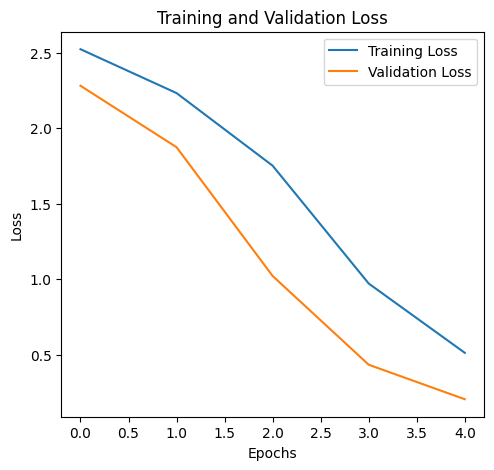

In [ ]:
# Membuat plot untuk Loss
plt.figure(figsize=(12, 5))

# Plot untuk Training dan Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

## Konversi Model

In [ ]:
save_path = 'mymodel/'
tf.saved_model.save(model, save_path)

In [ ]:
model.save("model_keras.keras")
# Atau, menggunakan format HDF5
model.save("model_h5.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!saved_model_cli show --dir /content/mymodel --tag_set serve --signature_default

2024-11-14 08:35:11.714931: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-14 08:35:11.714987: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-14 08:35:11.716630: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-14 08:35:12.909728: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
FATAL Flags parsing error: Unknown command line flag 'signature_default'. Did you mean: signature_def, signature_def_key ?
Pass --helpshort or --helpfull to see help on flags.


In [ ]:
!tensorflowjs_converter \
    --input_format = tf_saved_model \
    /content/mymodel/ \
    /content/modeltfjs

2024-11-14 08:35:21.273614: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-14 08:35:21.273679: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-14 08:35:21.275657: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-14 08:35:22.291155: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: TensorFlow.js model converters. [-h]
                                       [--input_format {tfjs_layers_model,keras_keras,tf_frozen_model,tf_hub,keras,keras_saved_model,tf_saved_model}]
                                       [--outpu

In [ ]:
! tensorflowjs_converter \
    --input_format=keras \
    /content/model_h5.h5 /content/modeltfjs

2024-11-14 08:35:48.498857: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-14 08:35:48.498925: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-14 08:35:48.500259: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-14 08:35:49.533371: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
model = tf.keras.models.load_model("/content/model_h5.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator()
data_generator = datagen.flow_from_directory(data_dir)

labels = list(data_generator.class_indices.keys())

# Simpan daftar label ke dalam file label.txt
with open("path/to/label.txt", "w") as f:
    for label in labels:
        f.write(label + "\n")


Found 1129 images belonging to 10 classes.


In [1]:
! pip freeze > requirements.txt

## Inference (Optional)